In [240]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt
import roadrunner as rr

In [ ]:
modelName = "Model1bound"
#modelName = "Model2bound"


model = bionetgen.bngmodel(modelName + ".bngl") 
sim = model.setup_simulator() 
sim.setIntegrator('cvode')


In [264]:
for s in model.species:
    print(s, model.species[s])

0 Ras(a~0,sos) RasTotal
1 Ras(a~0,sos!1).Sos(ras!1) initialBoundSOS


In [265]:
model.parameters['initialBoundSOS'] = boundSOS
boundSOS

Ras(a~0,sos!1).Sos(ras!1) initalBoundSOS

In [266]:
free_Ras = None
bound_SOS = None

for s in model.species:
    label = str(s)
    if label.startswith("Ras(a~0,sos) RasTotal"):
        free_Ras = s
    elif label.startswith("Ras(a~0,sos!1).Sos(ras!1) initialBoundSOS"):
        bound_SOS = s

print("Free Ras:", free_Ras)
print("Bound SOS:", bound_SOS)

Free Ras: None
Bound SOS: None


In [267]:

species_list = list(model.species)  # convert to list  access by index
free_Ras  = species_list[0]  # Ras(a~0,sos) RasTotal
bound_SOS = species_list[1]  # Ras(a~0,sos!1).Sos(ras!1) initialBoundSOS

# Number of initially bound SOS
n_bound = 1

RasTotal = 1000 

model.species[bound_SOS] = n_bound
model.species[free_Ras] = RasTotal - n_bound

print("Free Ras count:", model.species[free_Ras])
print("Bound SOS count:", model.species[bound_SOS])




Free Ras count: 999
Bound SOS count: 1


In [ ]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration 
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 10000
n_steps = 1000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('cvode')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

   
    plt.figure(figsize=(8,5))
    plt.plot(traj[:, 0], traj[:, 1], label=f'{n_bound} SOS bound')  # time vs totalRasGTP
    plt.xlabel('Time')
    plt.ylabel('Activated Ras (GTP)')
    plt.title(f'Deterministic Ras Activation vs Time ({n_bound} SOS bound)\nRhoSOS={RhoSOS}')
    plt.legend()
    plt.show()

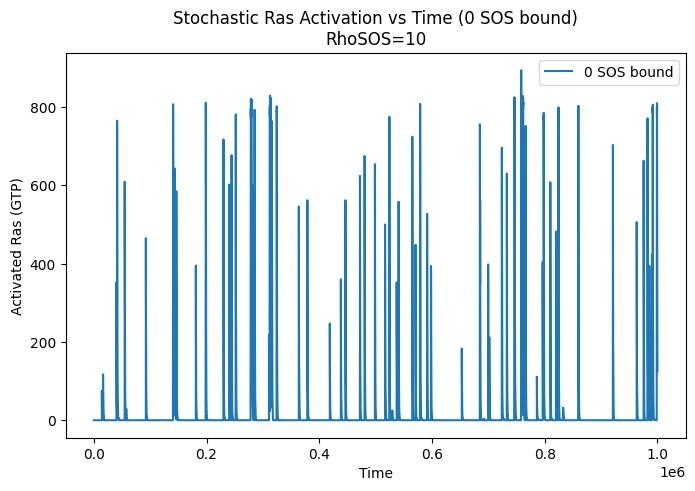

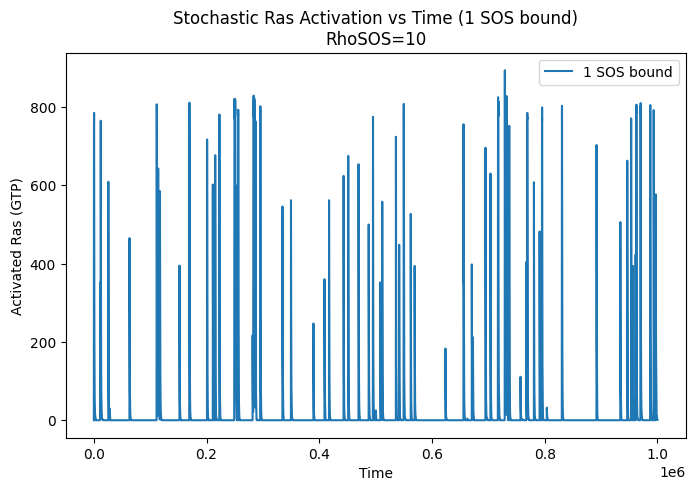

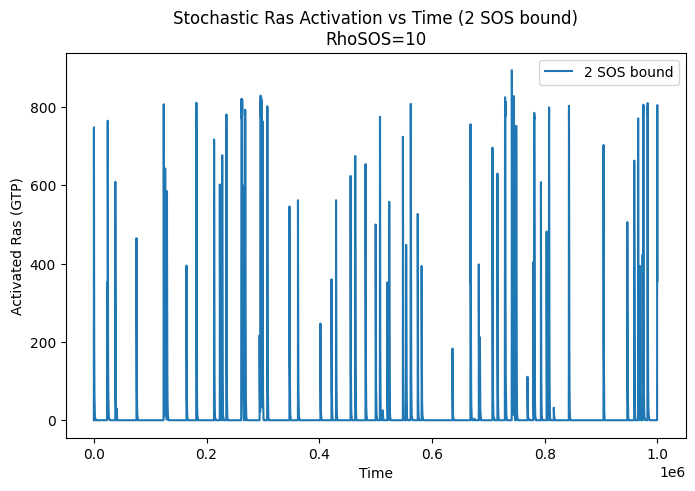

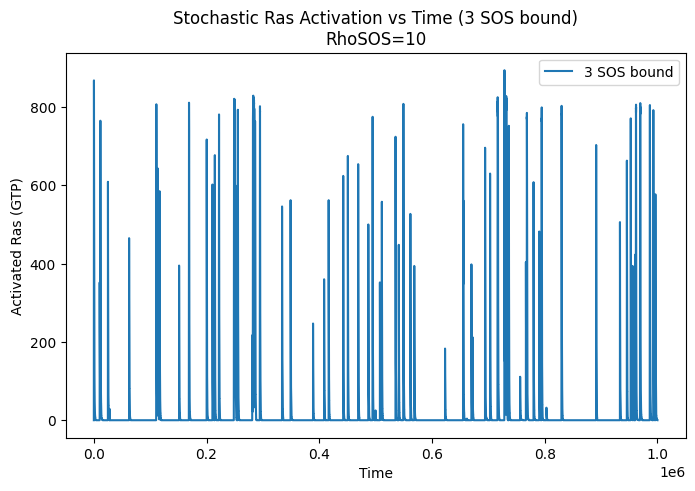

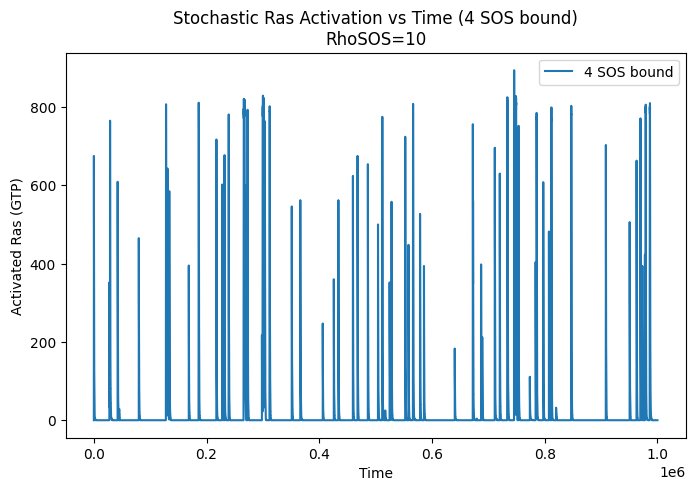

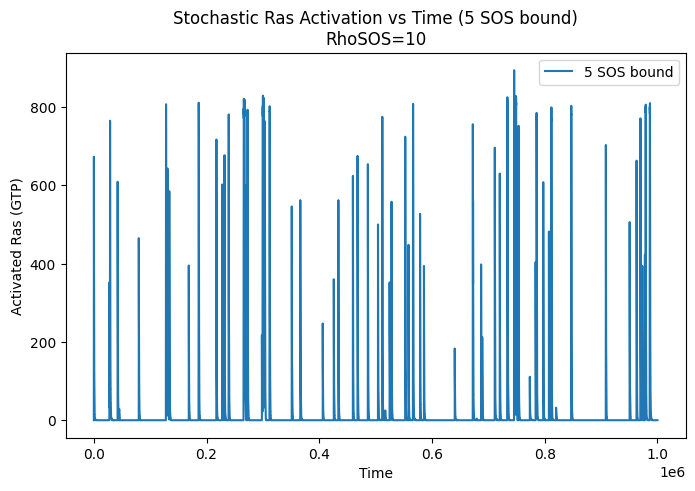

In [ ]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration 
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 10000
n_steps = 1000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('gillespie')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

   
    plt.figure(figsize=(8,5))
    plt.plot(traj[:, 0], traj[:, 1], label=f'{n_bound} SOS bound')  # time vs totalRasGTP
    plt.xlabel('Time')
    plt.ylabel('Activated Ras (GTP)')
    plt.title(f'Stochastic Ras Activation vs Time ({n_bound} SOS bound)\nRhoSOS={RhoSOS}')
    plt.legend()
    plt.show()

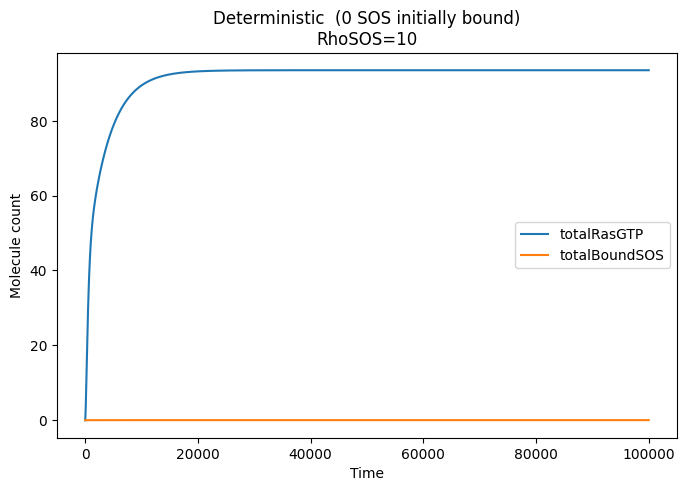

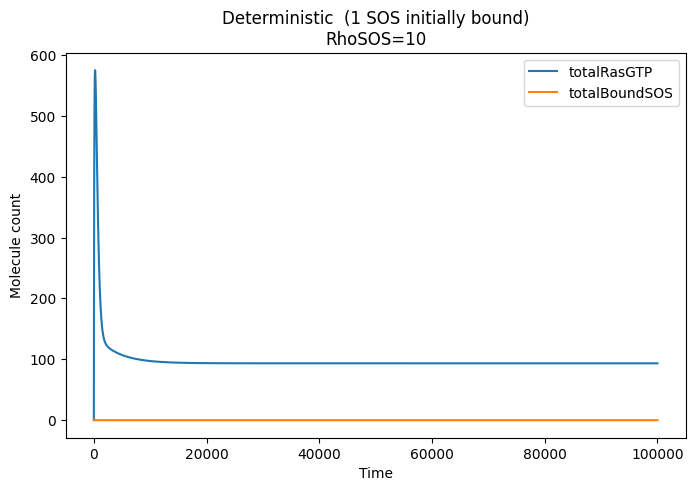

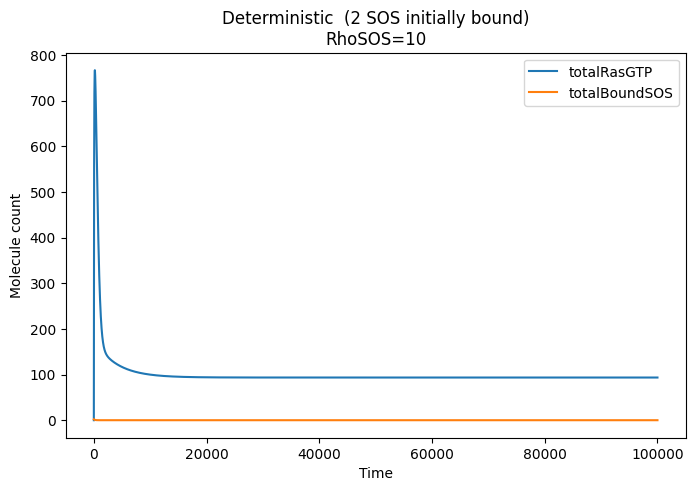

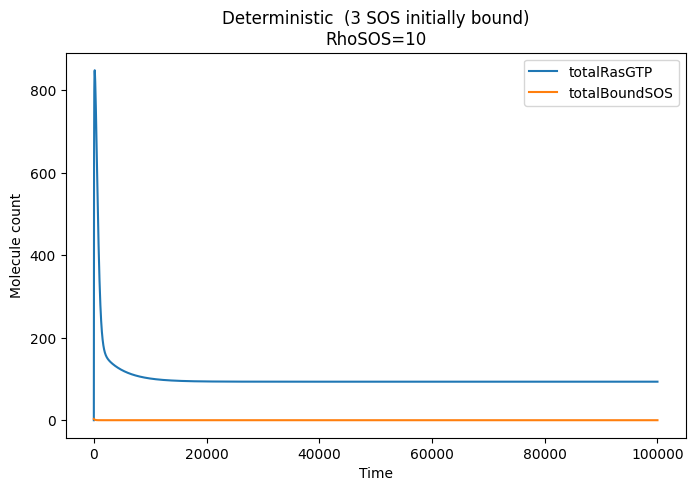

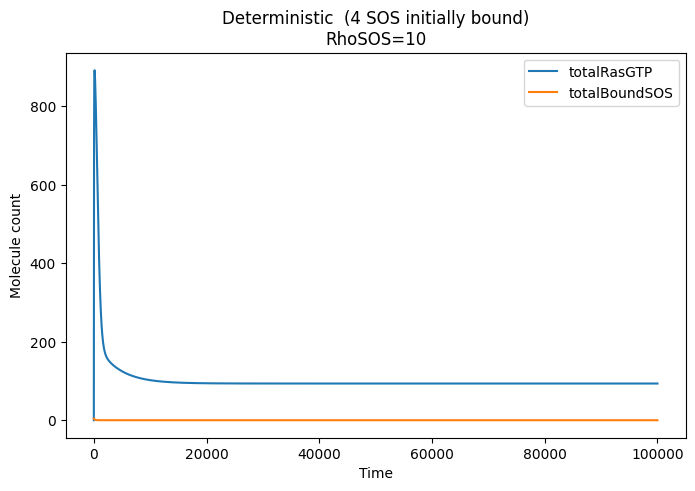

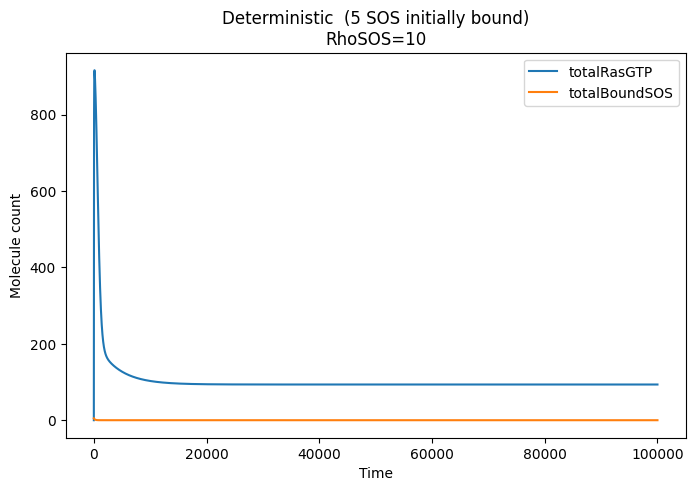

In [297]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration 
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 100000
n_steps = 10000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('cvode')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

  
    plt.figure(figsize=(8,5))

    plt.plot(traj[:, 0], traj[:, 1], label='totalRasGTP')
    plt.plot(traj[:, 0], traj[:, 2], label='totalBoundSOS')

    plt.xlabel('Time')
    plt.ylabel('Molecule count')
    plt.title(
        f'Deterministic  ({n_bound} SOS initially bound)\nRhoSOS={RhoSOS}'
    )
    plt.legend()
    plt.show()

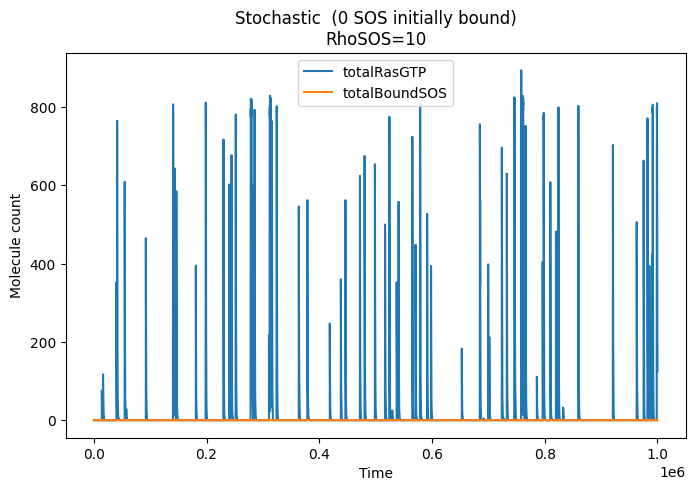

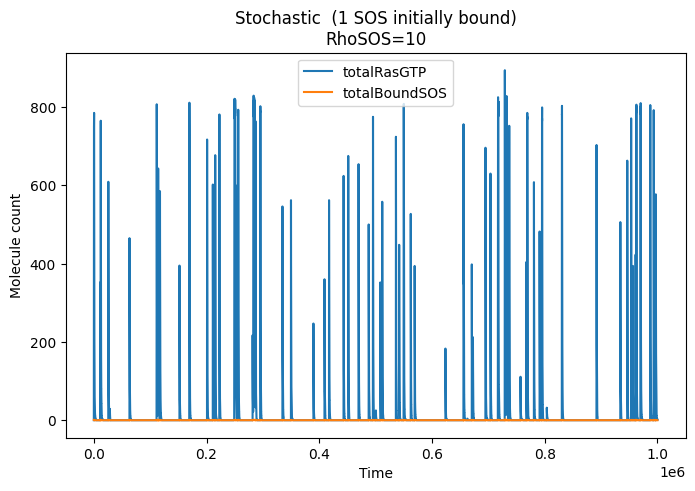

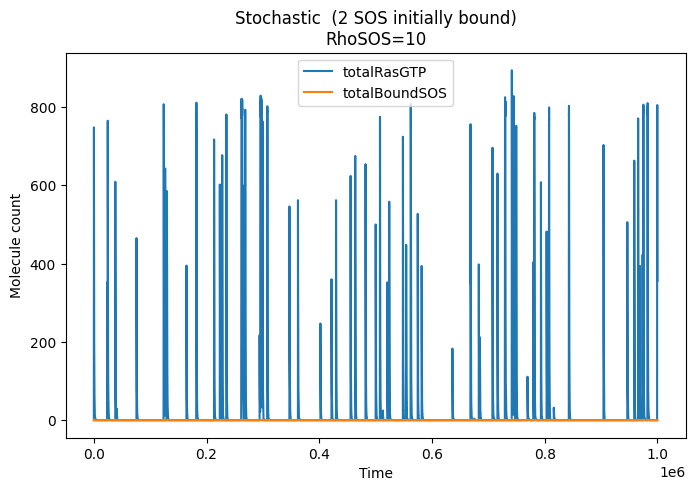

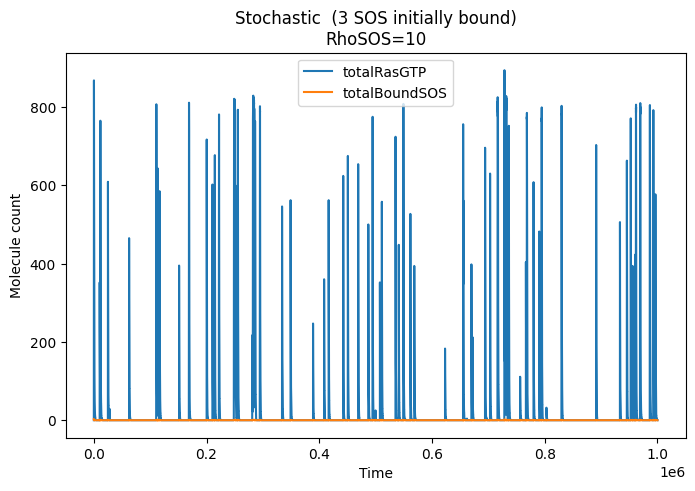

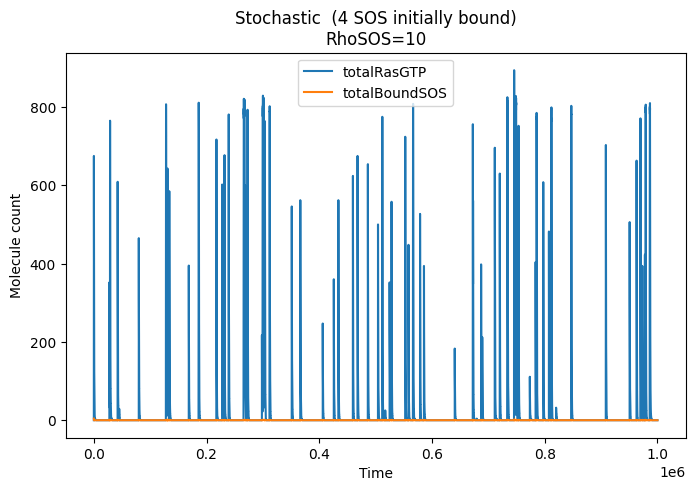

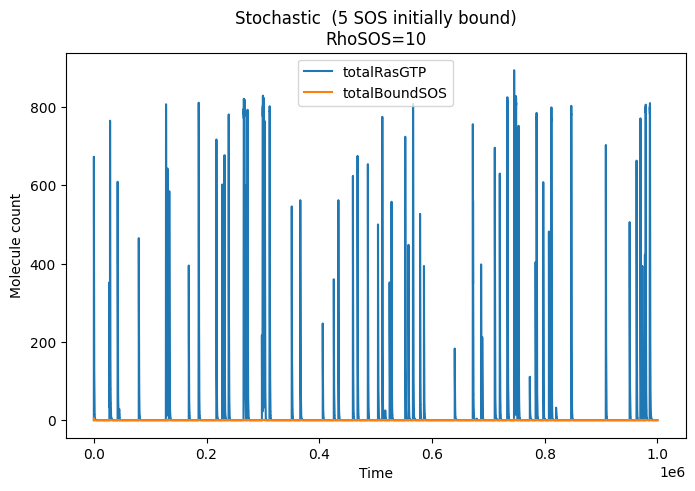

In [298]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration to change
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 1000000
n_steps = 100000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('gillespie')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

    plt.figure(figsize=(8,5))

    plt.plot(traj[:, 0], traj[:, 1], label='totalRasGTP')
    plt.plot(traj[:, 0], traj[:, 2], label='totalBoundSOS')

    plt.xlabel('Time')
    plt.ylabel('Molecule count')
    plt.title(
        f'Stochastic  ({n_bound} SOS initially bound)\nRhoSOS={RhoSOS}'
    )
    plt.legend()
    plt.show()